# E-commerce Technologies Coursework 2
## Churn Predictions

### 1. Setup


In [5]:
#  import the necessary libraries 
import pandas as pd
import graphviz
from sklearn import tree
 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 2. Get Data

In [2]:
# get data
data = pd.read_csv('MOCK_DATA.csv', header = 0)

In [3]:
data.head()

,customer_id,account_length,total_orders,total_amount_spent,days_since_last_purchase,experience,product_range,likeliness_to_recommend,product_quality,time_spent_in_the_shop_last,page_views_last,churn
0,1,61,4,439,69,4,1,3,2,5,5,1
1,2,28,5,135,36,3,2,1,3,48,10,1
2,3,81,2,391,61,3,3,2,3,28,17,1
3,4,42,3,439,45,1,3,3,2,44,6,1
4,5,15,3,462,48,3,1,3,4,10,15,1


In [13]:
# features
train = data.iloc[:, 1:10]
# category, i.e. churn (1), not churn (0)
label = data['churn']

In [14]:
train.head()

,account_length,total_orders,total_amount_spent,days_since_last_purchase,experience,product_range,likeliness_to_recommend,product_quality,time_spent_in_the_shop_last
0,61,4,439,69,4,1,3,2,5
1,28,5,135,36,3,2,1,3,48
2,81,2,391,61,3,3,2,3,28
3,42,3,439,45,1,3,3,2,44
4,15,3,462,48,3,1,3,4,10


In [15]:
# Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=0)

### 3. Create a Decision Tree

In [16]:
# instantiate the decision tree model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

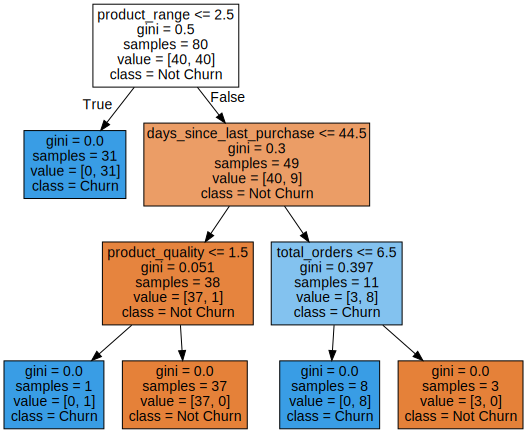

In [17]:
# create a dot data model
dot_data =  tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['Not Churn', 'Churn'],
                                filled=True)

# visualize the decision tree
graph = graphviz.Source(dot_data, format="png") 
graph

### 4. Evaluation

#### 4.1. Accuracy Using the Training Set

In [18]:
# predict churn using the train set
y_pred_train_set = clf.predict(X_train)
# find accuracy
accuracy_train_set = accuracy_score(y_pred_train_set, y_train)

print('Tree Accuracy: {}'.format(accuracy_train_set))
print('TREE CLASSIFICATION REPORT')
print(classification_report(y_train, y_pred_train_set))

Tree Accuracy: 1.0
TREE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### 4.2. Accuracy Using the Testing Set

In [19]:
# predict churn using the test set
y_pred_test_set = clf.predict(X_test)
# find accuracy
accuracy_test_set = accuracy_score(y_pred_test_set, y_test)

print('Tree Accuracy: {}'.format(accuracy_test_set))
print('TREE CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_test_set))

Tree Accuracy: 0.95
TREE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

